In [114]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [115]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [116]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [117]:
dataset.shape

(150, 5)

In [118]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [119]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<IPython.core.display.Javascript object>


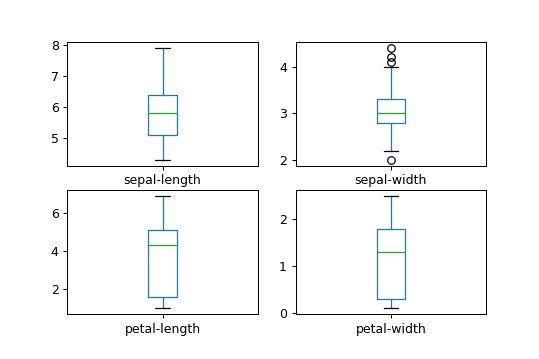

In [120]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

<IPython.core.display.Javascript object>


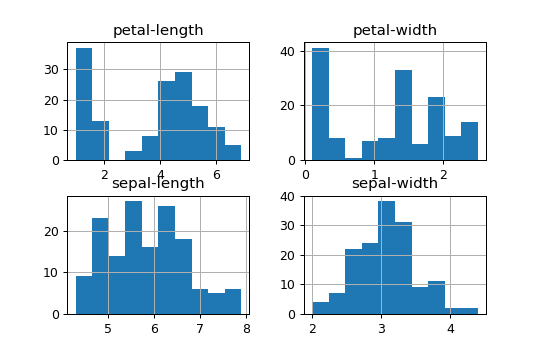

In [121]:
dataset.hist()
plt.show()

In [122]:
dataset.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [123]:
X = dataset[["sepal-length", "sepal-width", "petal-length", "petal-width"]]
y = dataset["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.97368421052631582

In [132]:
import random

X_test_instc = X_test.loc[np.random.choice(X_test.index, 1, replace=False)]
class_predict = knn.predict(X_test_instc)

print("Predicted class: ", class_predict[0])

#actual class vs prediction
y_test_instc = pd.Series.to_frame(y_test)
X_test_instc.reset_index(level = 0, inplace = True)
y_test_instc.reset_index(level = 0, inplace = True)

print("Actual class:", y_test_instc.loc[y_test_instc["index"] == X_test_instc.iloc[0,0], "class"].to_string(index=False))

Predicted class:  Iris-virginica
Actual class: Iris-versicolor


<IPython.core.display.Javascript object>


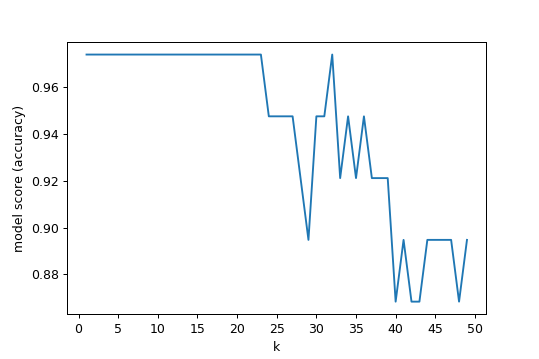

In [128]:
score = []
k = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
    k.append(i)
    
plt.figure()
plt.xlabel("k")
plt.ylabel("model score (accuracy)")
plt.plot(k, score)
plt.xticks(range(0, 55, 5));

<IPython.core.display.Javascript object>


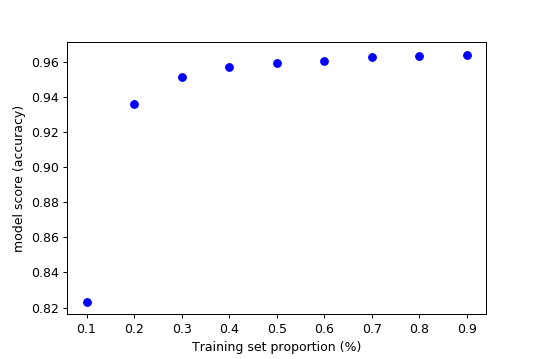

In [99]:
t = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

plt.figure()
plt.xlabel('Training set proportion (%)')
plt.ylabel('model score (accuracy)');

for s in t:
    scores = []
    for i in range(1,1000):
        knn = KNeighborsClassifier(n_neighbors = 5)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1- s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')